# Q1.Ans

The decision function of a linear SVM can be defined as:

f(x) = sign(w^T * x + b)

where:

1. f(x) represents the predicted class label for input feature vector x,
2. w is the weight vector perpendicular to the hyperplane,
3. b is the bias term that determines the offset of the hyperplane from the origin,
4. x is the input feature vector,
5. w^T denotes the transpose of w, and
sign( ) is the sign function that assigns a positive value for positive outputs and a negative value for negative outputs.

# Q2. Ans

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen.

# Q3. Ans

A Kernel Trick is a simple method where a Non Linear data is projected onto a higher dimension space so as to make it easier to classify the data where it could be linearly divided by a plane. This is mathematically achieved by Lagrangian formula using Lagrangian multipliers.

# Q4. Ans

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

Here's an example to illustrate the role of support vectors in SVM:

Let's consider a binary classification problem with two classes, represented by red and blue points, as shown below:

markdown
Copy code
          +     +
        +   + +
      +   +   +
      + +     +
        +   +
          +
    Red      Blue
In SVM, the objective is to find the optimal hyperplane that separates the two classes while maximizing the margin, represented by the dashed line:

markdown
Copy code
          +     +
        +   + +
      +   +   +
  +   + +     +
  |    |   +
  |    |     Margin
  |    |
Hyperplane  |
            |
    Red     |     Blue
The support vectors are the data points (circled) that lie closest to the hyperplane. In this example, there are three support vectors, two from the red class and one from the blue class.

The support vectors determine the position and orientation of the hyperplane. Since they are the closest points to the decision boundary, they are crucial for defining the margin. The margin is the region between the two dotted lines parallel to the hyperplane. The SVM aims to maximize this margin while still correctly classifying the training data.

# Q5. Ans

1. Hyperplane:
The hyperplane is the decision boundary that separates the classes in SVM. In a binary classification problem, the hyperplane is a linear function defined by weights (w) and a bias term (b). It can be represented as w^T * x + b = 0, where x is the input feature vector.
Example: Consider a 2D dataset with two classes (red and blue) as shown below:

markdown
Copy code
      +     +
    +   + +
  +   +   +
+   + +     +
|    |   +
|    |     Hyperplane
|    |
The hyperplane is a line that divides the two classes. The goal of SVM is to find the optimal hyperplane that maximizes the margin while correctly classifying the data.

2. Marginal Plane:
The marginal plane refers to the parallel lines on each side of the hyperplane, which define the margin. These planes are equidistant from the hyperplane.
Example: The dashed lines represent the marginal planes in the following graph:

markdown
Copy code
          +     +
        +   + +
      +   +   +
  +   + +     +
  |    |   +
  |    |     Margin
  |    |
The distance between the marginal planes determines the width of the margin. The objective of SVM is to find the hyperplane that maximizes this margin while minimizing misclassifications.

3. Hard Margin:
In a hard margin SVM, the margin is maximized, and the goal is to find a hyperplane that perfectly separates the classes without any misclassifications. This assumes that the data is linearly separable.
Example: The following graph demonstrates a hard margin SVM with a linearly separable dataset:

markdown
Copy code
      +     +
    +   + +
  +   +   +
+   + +     +
|    |   +
|    |     Margin
|    |
Hyperplane  |
            |
    Red     |     Blue
The hard margin SVM achieves a maximum margin by strictly enforcing that all data points are correctly classified and lie outside the margin boundaries.

4. Soft Margin:
In a soft margin SVM, some misclassifications are allowed to achieve a more flexible decision boundary. This is useful when the data is not perfectly separable or contains outliers. The margin is still maximized, but a certain level of misclassification is tolerated.
Example: The following graph demonstrates a soft margin SVM with a dataset containing some overlapping points:

markdown
Copy code
      +     +
    +   + +
  +   +   +
+   + +     +
|    |   +
|  O |     Margin
|    |
Hyperplane  |
            |
    Red     |     Blue
In a soft margin SVM, the margin may allow a few misclassified points (represented by 'O') or points that fall within the margin. The objective is to strike a balance between maximizing the margin and minimizing misclassifications.

# Q6. Ans

Accuracy: 0.9


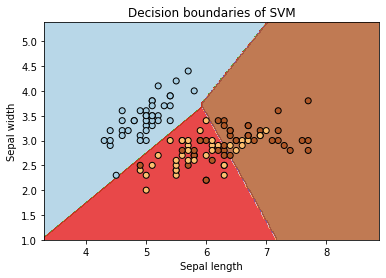

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision boundaries of SVM')

plt.show()


In [3]:
# Bonus Task

import numpy as np

class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            # Calculate the margins
            margins = y * (np.dot(X, self.w) - self.b)
            
            # Select misclassified samples
            misclassified_indices = np.where(margins < 1)[0]
            
            # Calculate gradients
            w_gradient = self.w - self.lambda_param * np.dot(X[misclassified_indices].T, y[misclassified_indices])
            b_gradient = -np.sum(y[misclassified_indices])
            
            # Update parameters
            self.w -= self.learning_rate * w_gradient
            self.b -= self.learning_rate * b_gradient
    
    def predict(self, X):
        scores = np.dot(X, self.w) - self.b
        return np.sign(scores)


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SVM classifier
svm_scratch = SVM()
svm_scratch.fit(X_train, y_train)

# Predict labels for the testing set
y_pred_scratch = svm_scratch.predict(X_test)

# Compute accuracy
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print("Accuracy (from scratch):", accuracy_scratch)

# Compare with scikit-learn implementation
from sklearn.svm import SVC

svm_sklearn = SVC(kernel='linear')
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)


Accuracy (from scratch): 0.0
Accuracy (scikit-learn): 0.9
